# DS 3000 - Practicum 1

**Students Name**: Amartya Dharma, Lucas Oberwager, Nuri Raheem, Samuel Baldwin
**Date**: Friday, Oct 3rd.

## Question 1:

In your own words, formulate the Data Science problem that you were given.

The Data Science problem involves analyzing flight data for all flights in 2019 that either originated from or departed to the states of Arizona (AZ), Nevada (NV), and California (CA). The goal is to perform a comprehensive analysis on flight delays to see air traffic patterns and airline carrier patterns in the given regions.

# Question 2:

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).

Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.

At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("2019_ONTIME_REPORTING_FSW.csv")
print(df.dtypes)
print(df.head(5))

FL_DATE          object
CARRIER_CODE     object
TAIL_NUM         object
FL_NUM            int64
ORIGIN           object
ORIGIN_ST        object
DEST             object
DEST_ST          object
DEP_TIME        float64
DEP_DELAY       float64
ARR_TIME        float64
ARR_DELAY       float64
ELAPSED_TIME    float64
DISTANCE        float64
dtype: object
      FL_DATE CARRIER_CODE TAIL_NUM  FL_NUM ORIGIN ORIGIN_ST DEST DEST_ST  \
0  2019-10-01           AA   N916NN    2311    TUS        AZ  ORD      IL   
1  2019-10-01           AA   N733UW    2315    PHX        AZ  DEN      CO   
2  2019-10-01           AA   N140AN    2318    DFW        TX  LAX      CA   
3  2019-10-01           AA   N925AN    2325    SNA        CA  DFW      TX   
4  2019-10-01           AA   N143AN    2328    ATL        GA  LAX      CA   

   DEP_TIME  DEP_DELAY  ARR_TIME  ARR_DELAY  ELAPSED_TIME  DISTANCE  
0     828.0        0.0    1353.0        0.0         205.0    1437.0  
1    1907.0        0.0    2159.0        0.0    

In [ ]:
# convert all dates to proper datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# change relavant columns to category
for col in ['CARRIER_CODE', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_ST', 'DEST', 'DEST_ST']:
  df[col] = df[col].astype('category')

# flight number is an identifier, treat it as a str
df['FL_NUM'] = df['FL_NUM'].astype(str)

# convert departure and arrival times to datetime
def convert_to_time(hhmm: float) -> datetime.time:
    if pd.isna(hhmm):
        return None
    hhmm_str = f'{int(hhmm):04}'  # Ensure it's 4 digits (e.g., 0830 for 8:30 AM)

    # Handle the special case where hhmm is 2400 (convert to 1 min before midnight)
    if hhmm_str == '2400':
        hhmm_str = '2359'

    try:
      return datetime.strptime(hhmm_str, '%H%M').time()
    except ValueError:
      print(f"Invalid time format: {hhmm}")
      return None

df['DEP_TIME'] = df['DEP_TIME'].apply(convert_to_time)
df['ARR_TIME'] = df['ARR_TIME'].apply(convert_to_time)

print(df.dtypes)

FL_DATE         datetime64[ns]
CARRIER_CODE          category
TAIL_NUM              category
FL_NUM                  object
ORIGIN                category
ORIGIN_ST             category
DEST                  category
DEST_ST               category
DEP_TIME                object
DEP_DELAY              float64
ARR_TIME                object
ARR_DELAY              float64
ELAPSED_TIME           float64
DISTANCE               float64
dtype: object


In [ ]:
# Perform some EDA, find incorrect values

missing_data_summary = df.isna().sum()

# Descriptive statistics to look for outliers or invalid values
descriptive_stats = df.describe(include='all')

# Check unique values for the time columns to identify invalid time values
unique_dep_times = df['DEP_TIME'].unique()
unique_arr_times = df['ARR_TIME'].unique()

print(
    missing_data_summary, descriptive_stats, unique_dep_times, unique_arr_times
)

# Fix some issues with the data

# Assume a blank delay means there was no delay
df.fillna({"DEP_DELAY": 0, "ARR_DELAY": 0}, inplace=True)

# Drop rows with a missing TAIL_NUM, since these are needed for Q6
# Drop rows w/o DEP_TIME & ARR_TIME, as we can't use these for analysis
# Drop rows with missing ELAPSED_TIME
df.dropna(subset=['TAIL_NUM', 'DEP_TIME', 'ARR_TIME', 'ELAPSED_TIME'], inplace=True)

missing_data_summary = df.isna().sum()
descriptive_stats = df.describe(include='all')
print(
    missing_data_summary, descriptive_stats
)

FL_DATE            0
CARRIER_CODE       0
TAIL_NUM         651
FL_NUM             0
ORIGIN             0
ORIGIN_ST          0
DEST               0
DEST_ST            0
DEP_TIME        7352
DEP_DELAY       7356
ARR_TIME        7916
ARR_DELAY       9003
ELAPSED_TIME    9003
DISTANCE           1
dtype: int64                               FL_DATE CARRIER_CODE TAIL_NUM  FL_NUM  ORIGIN  \
count                          612452       612452   611801  612452  612452   
unique                            NaN           15     4666    6672     150   
top                               NaN           WN   N742SK     546     LAX   
freq                              NaN       177843      650     737   70325   
mean    2019-09-15 21:21:22.558632960          NaN      NaN     NaN     NaN   
min               2019-02-01 00:00:00          NaN      NaN     NaN     NaN   
25%               2019-10-04 00:00:00          NaN      NaN     NaN     NaN   
50%               2019-11-02 00:00:00          NaN      NaN  

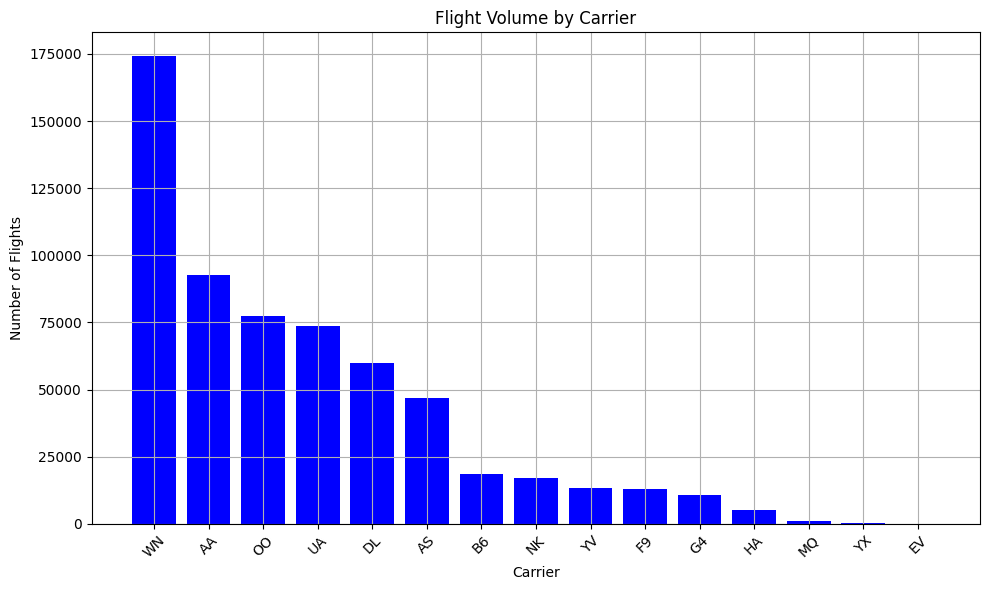

In [ ]:
flight_volume_by_carrier = df['CARRIER_CODE'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(flight_volume_by_carrier.index, flight_volume_by_carrier.values, color='blue')
plt.title('Flight Volume by Carrier')
plt.ylabel('Number of Flights')
plt.xlabel('Carrier')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This chart demonstrates that most flights are WN (Southwest) followed by AA (American Airlines) and UA (United Airlines)

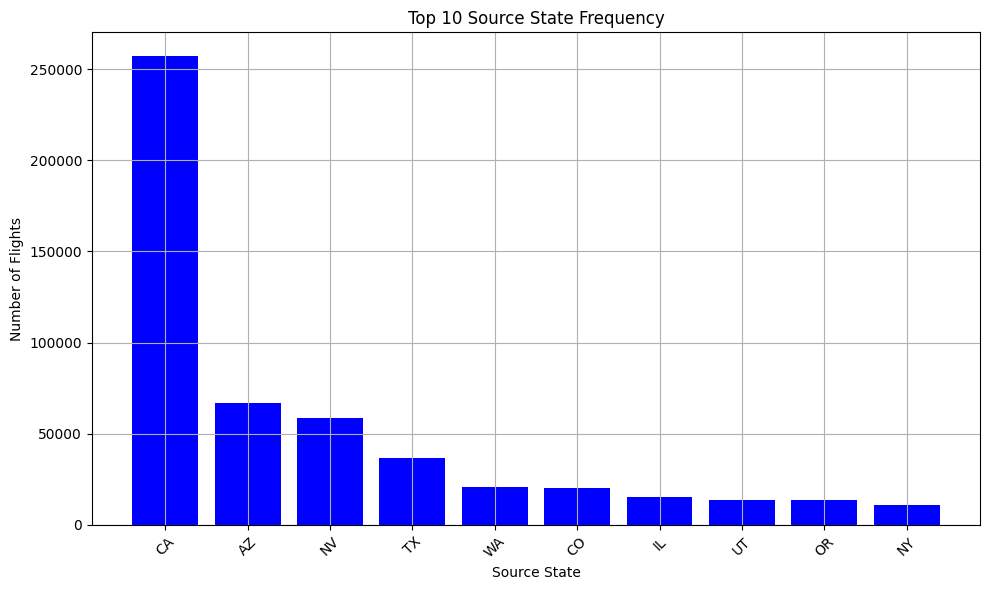

In [ ]:
flight_source_states = df['ORIGIN_ST'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(flight_source_states.index, flight_source_states.values, color='blue')
plt.title('Top 10 Source State Frequency')
plt.ylabel('Number of Flights')
plt.xlabel('Source State')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The state that has the most departing flights was California with over half a million flights, followed by Arizona with about 130000 and closely by Nevada with about 120000

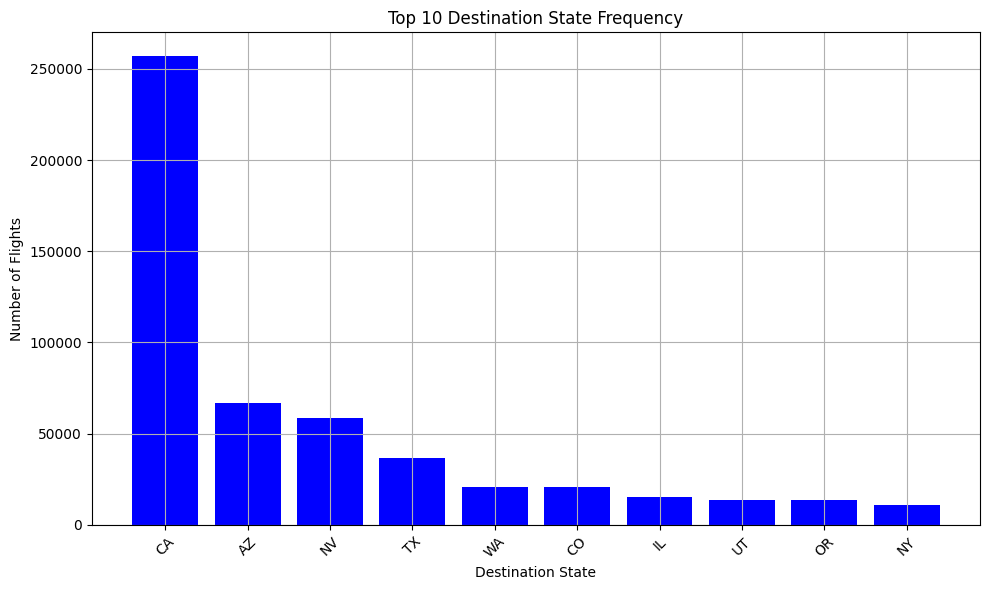

In [ ]:
flight_dest_states = df['DEST_ST'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(flight_dest_states.index, flight_dest_states.values, color='blue')
plt.title('Top 10 Destination State Frequency')
plt.ylabel('Number of Flights')
plt.xlabel('Destination State')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The state that source the most arriving flights was California with over half a million flights, followed by Arizona with about 130000 and closely by Nevada with about 120000

# Question 3.1

Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.

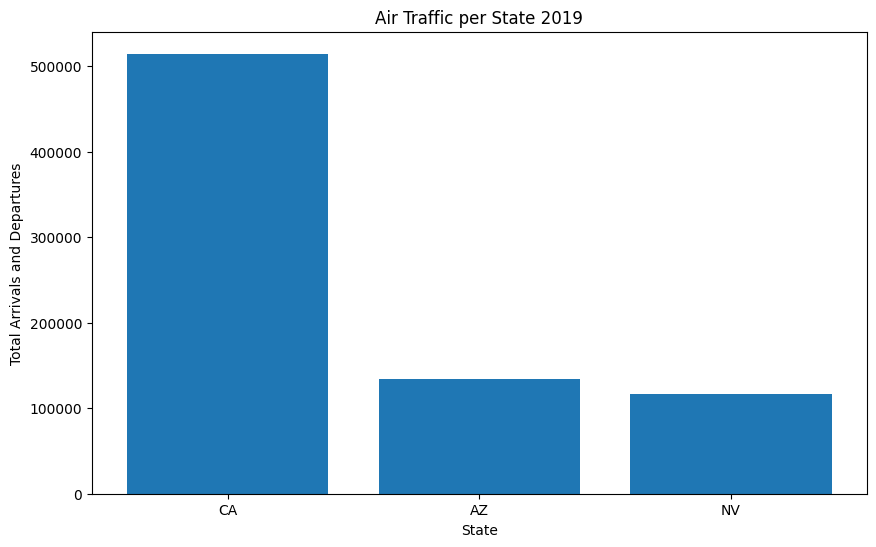

In [ ]:
# sum the number of arrivals, departures, and add those together
# append all to the empty list for each state
traffic_list = []
state_list = ['AZ', 'CA', 'NV']
for state in state_list:
    arrivals_count = (df['DEST_ST'] == state).sum()
    departures_count = (df['ORIGIN_ST'] == state).sum()
    traffic = arrivals_count + departures_count
    traffic_list.append([state, arrivals_count, departures_count, traffic])

# create a dataframe from the 2d list of air traffic data by state
columns = ['State', 'Arrivals', 'Departures', 'Total Flights']
air_traffic_df = pd.DataFrame(traffic_list, columns=columns)

# sort dataframe by greatest to least for total flights
air_traffic_df = air_traffic_df.sort_values(by='Total Flights', ascending=False)

# create a bar plot for air traffic by state
plt.figure(figsize=(10, 6))
plt.bar(air_traffic_df['State'], air_traffic_df['Total Flights'])
plt.xlabel('State')
plt.ylabel('Total Arrivals and Departures')
plt.title('Air Traffic per State 2019')
plt.show()

From the data provided we felt that the best way to analyze air traffic was based on the number of arrivals and departures for each of the 3 regions. Our rationality for choosing this method was that tracking inbound and outbound traffic demonstrates airport congestion very clearly, while other factors like flight duration are less significant for managing aircrafts entering and leaving the airport. If the data provided had offered information about how long each plane was in the airspace of each region, this would also have been a valuable measure.
This chart demonstrates that California has the most air traffic by far compared to the other regions with about half a million arriving or departing planes in 2019. Arizona and Nevada both have about the same air traffic at around 120000 arriving or departing planes.
This makes sense with the earlier found data for each states individual number of arriving and departing flights.

# Question 3.2 Most popular destinations

For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.


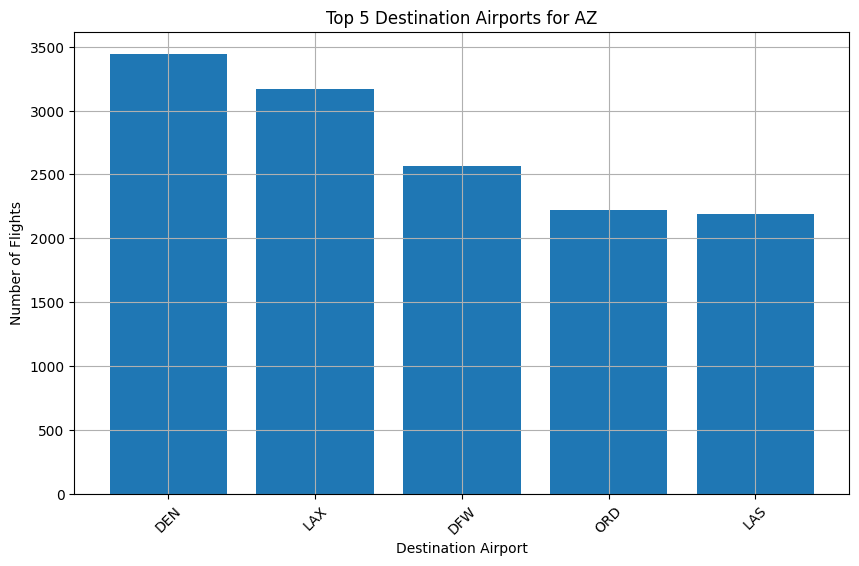

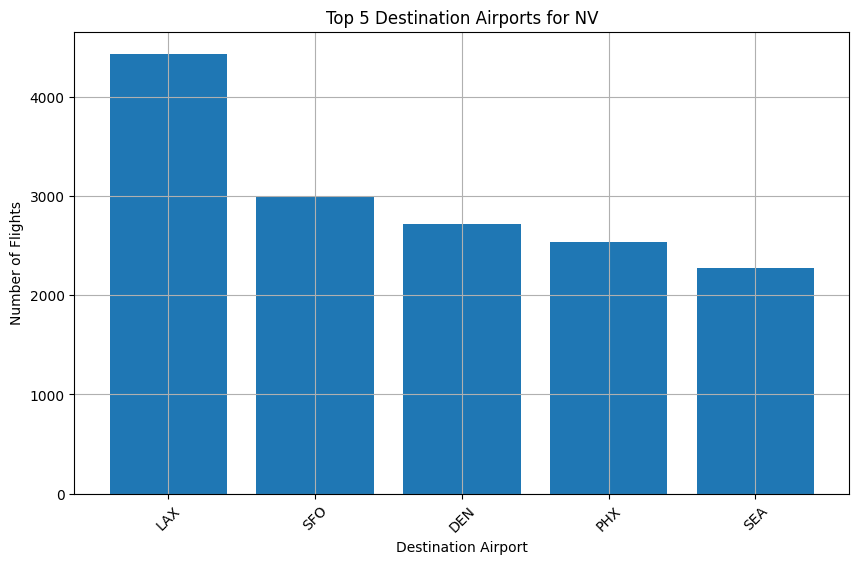

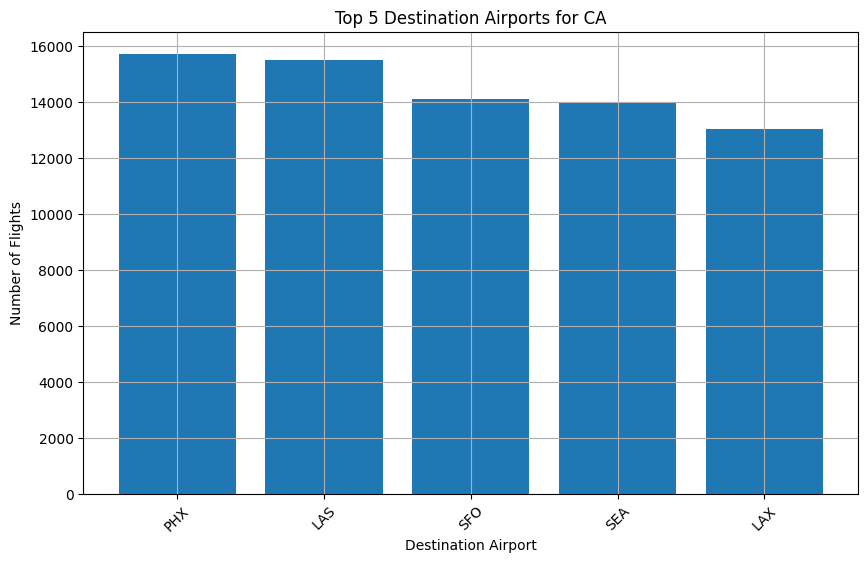

In [ ]:
for state in ['AZ', 'NV', 'CA']:
  # create a different plot for each state
  df_state = df[df['ORIGIN_ST'] == state]
  top_destinations = df_state['DEST'].value_counts().head(5) # only include top 5
  plt.figure(figsize=(10, 6))
  plt.bar(top_destinations.index, top_destinations.values)
  plt.title(f'Top 5 Destination Airports for {state}')
  plt.ylabel('Number of Flights')
  plt.xlabel('Destination Airport')
  plt.xticks(rotation=45)
  plt.grid(True)

Here we can see the top 5 destination airports for each of the 3 regions. The highest number of flights leaving from California end in PHX, the highest number of flights leaving from Nevada end in LAX, and the highest number of flights leaving from Arizona end in DEN. LAX and SEA appear in the top 5 destination airports for all 3 regions.




## Question 3.3

For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.

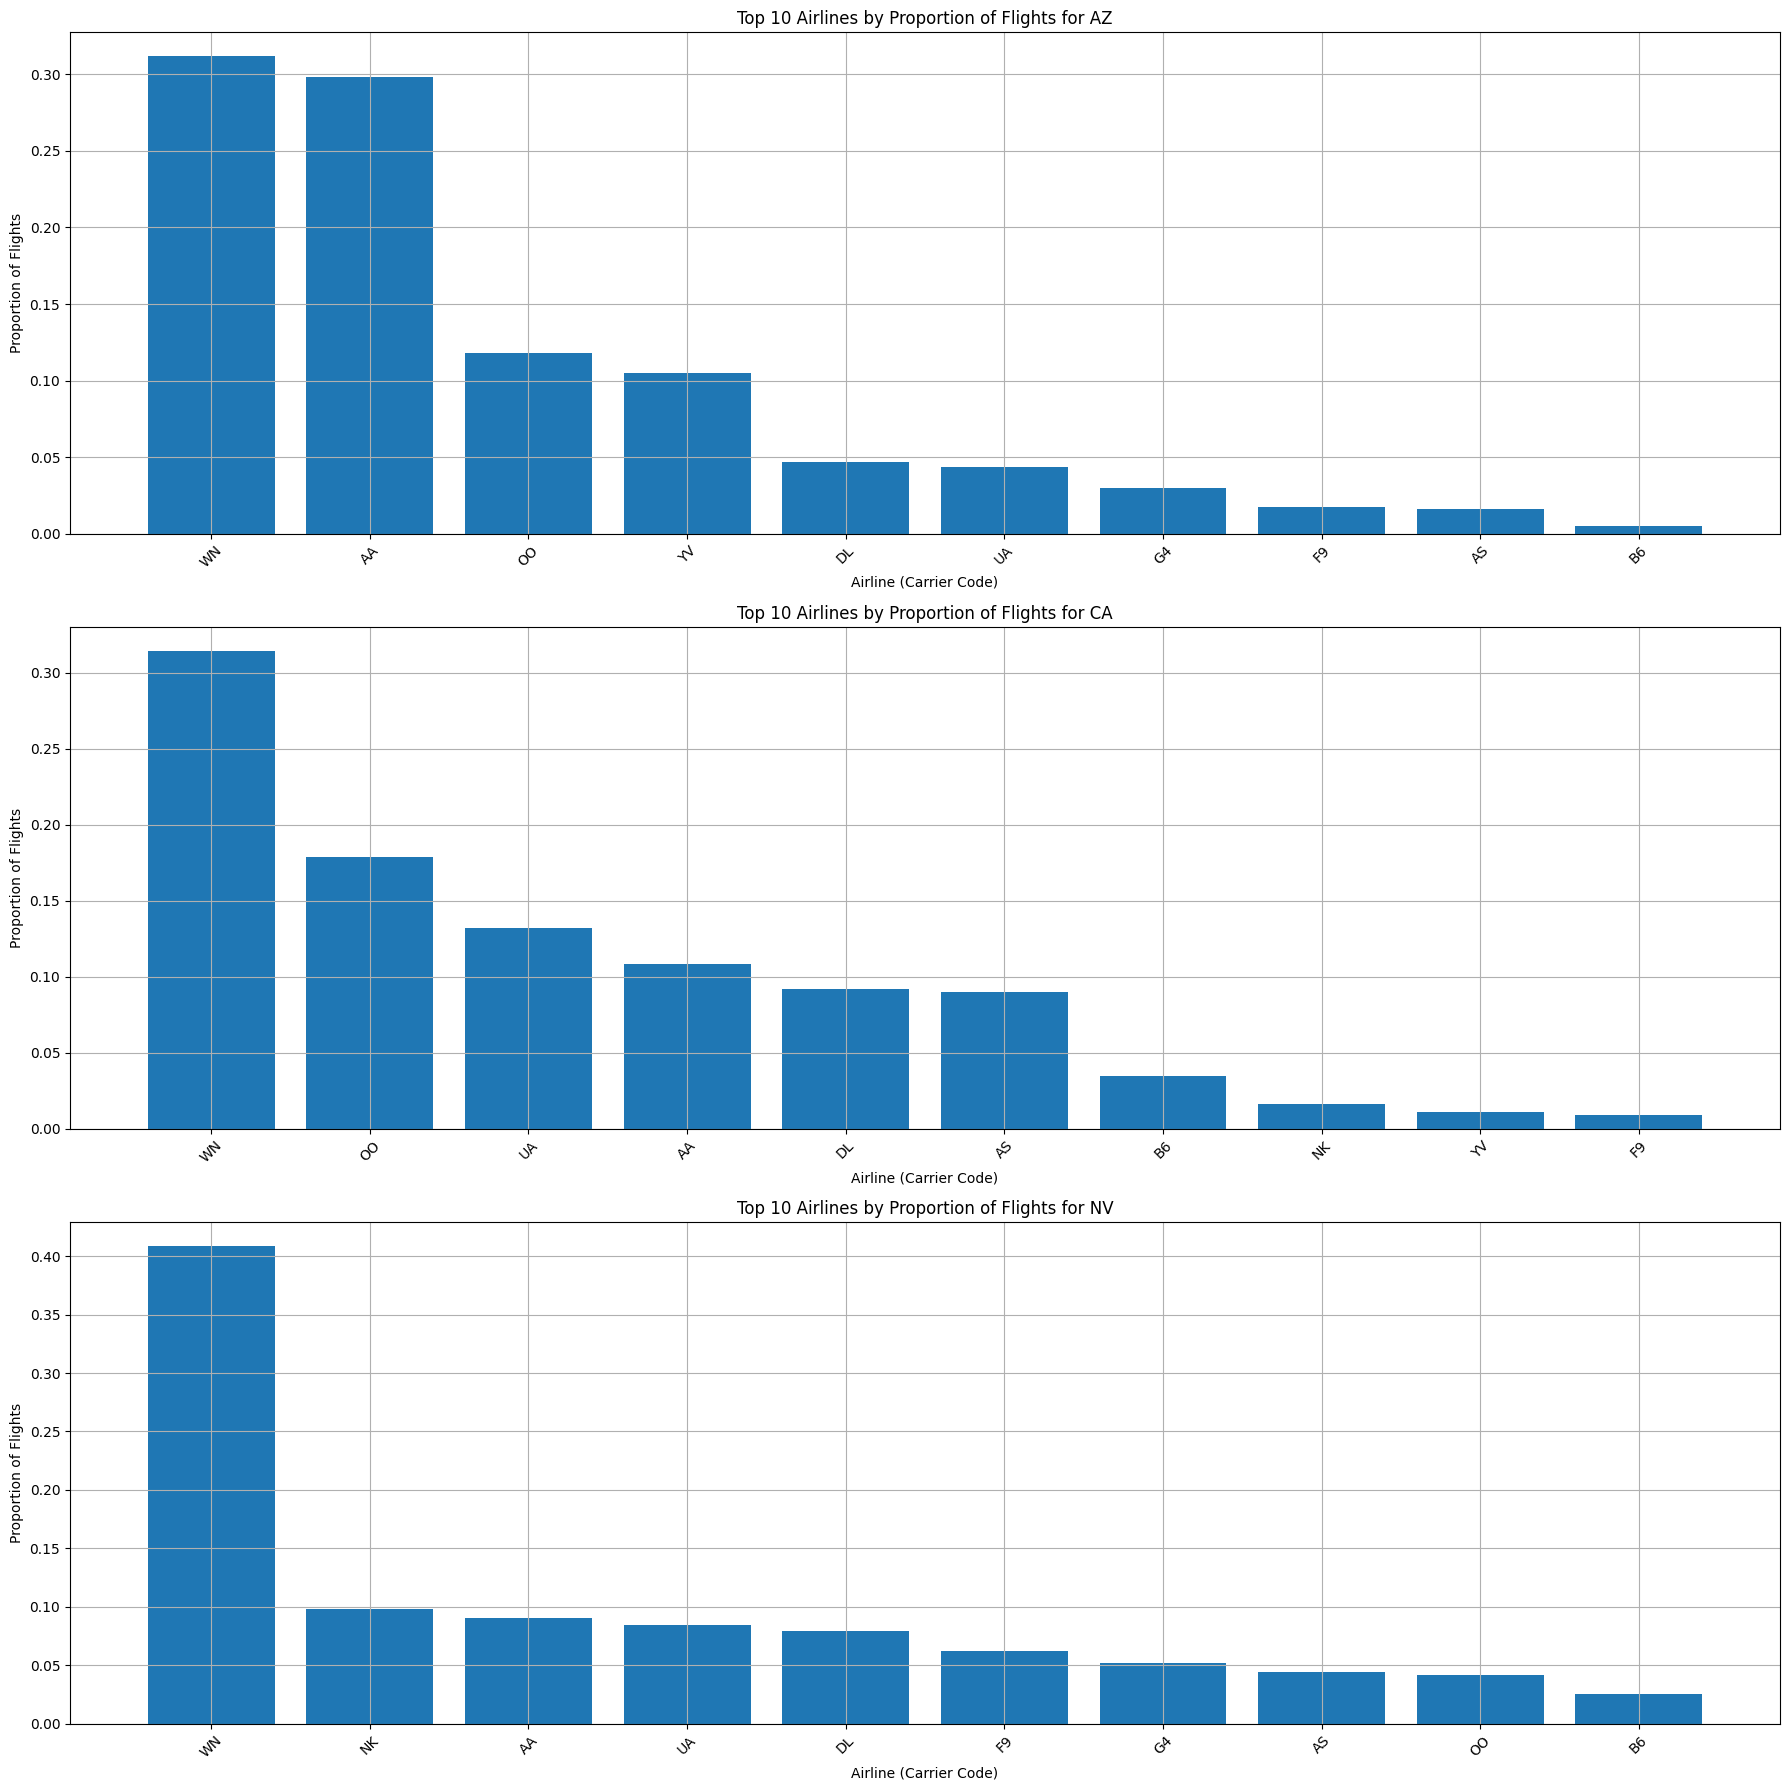

In [ ]:
plt.figure(figsize=(18, 18))

for i, state in enumerate(["AZ", "CA", "NV"], 1):
    # Filter the data for the given state
    df_state = df[df['ORIGIN_ST'] == state]

    # Step 2: Group by CARRIER_CODE and calculate the number of flights per airline
    airline_counts = df_state['CARRIER_CODE'].value_counts()

    # Step 3: Calculate the proportion of flights for each airline
    airline_proportions = airline_counts / airline_counts.sum()  # Proportion calculation

    # Step 4: Sort and select the top 10 airlines
    top_10_airlines = airline_proportions.head(10)

    # Step 5: Create a subplot for the top 10 airlines in this state
    plt.subplot(3, 1, i)  # 3 rows, 1 column, i-th plot
    plt.bar(top_10_airlines.index, top_10_airlines.values)
    plt.title(f'Top 10 Airlines by Proportion of Flights for {state}')
    plt.ylabel('Proportion of Flights')
    plt.xlabel('Airline (Carrier Code)')
    plt.xticks(rotation=45)
    plt.grid(True)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

From analyzing the proportion of flights from each airline for each of the three states, Southwest Airlines (WN) shows a clear dominance of the flights operated in each region, with over 30% of flights operated in every region. American Airlines (AA) is also in at least the top 5 operators for each flight. Interestingly, Nevada seems to have the least spread, with Southwest Airlines having a flight proportion of over 40%. This may be because Southwest has a small hub in Las Vegas.

# Question 4.1

Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.


<ipython-input-22-7369289b47e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delays_by_carrier = df.groupby('CARRIER_CODE')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index().sort_values(by='DEP_DELAY', ascending=False)
<ipython-input-22-7369289b47e3>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distance_by_carrier = df.groupby('CARRIER_CODE')['DISTANCE'].mean().reset_index().sort_values(by='DISTANCE', ascending=False)


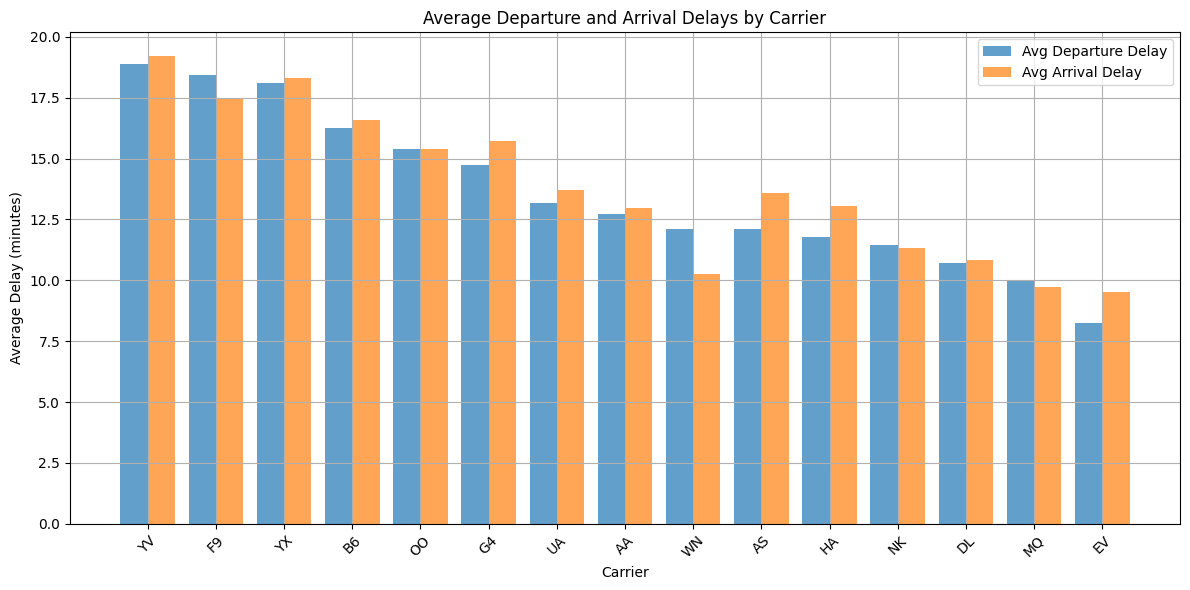

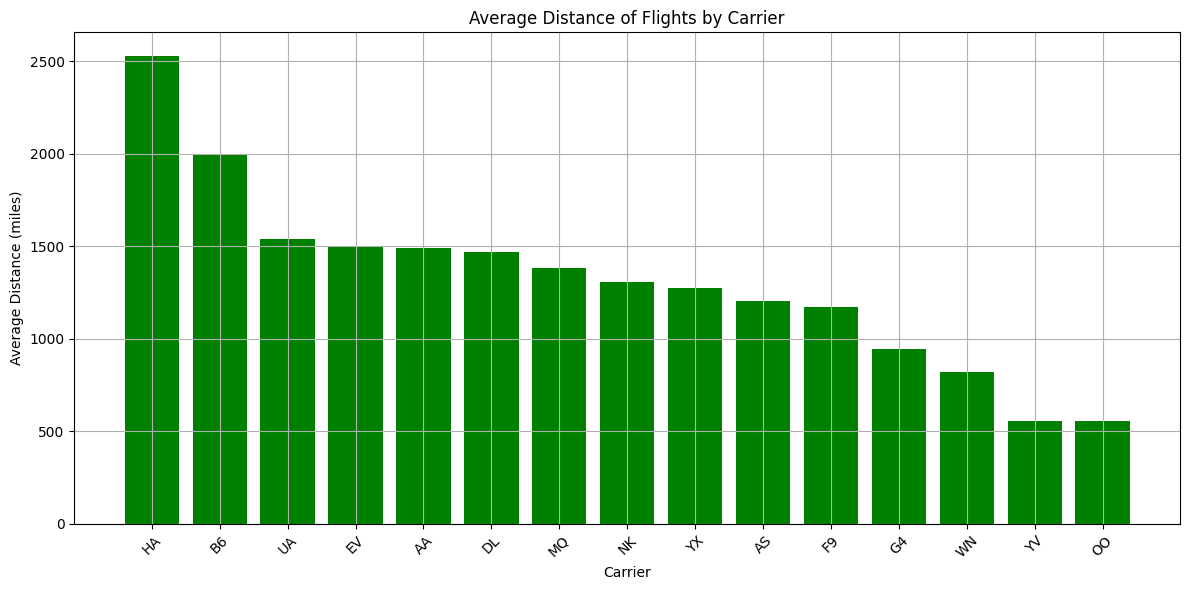

In [ ]:
# Calculate average delays of flights by carrier
avg_delays_by_carrier = df.groupby('CARRIER_CODE')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index().sort_values(by='DEP_DELAY', ascending=False)

# Calculate average flight distance by carrier
avg_distance_by_carrier = df.groupby('CARRIER_CODE')['DISTANCE'].mean().reset_index().sort_values(by='DISTANCE', ascending=False)

# Visualize the results
x = np.arange(len(avg_delays_by_carrier['CARRIER_CODE']))
bar_width = 0.4
plt.figure(figsize=(12, 6))
plt.bar(x, avg_delays_by_carrier['DEP_DELAY'], width=bar_width, label='Avg Departure Delay', alpha=0.7)
plt.bar(x + bar_width, avg_delays_by_carrier['ARR_DELAY'], width=bar_width, label='Avg Arrival Delay', alpha=0.7)
plt.title('Average Departure and Arrival Delays by Carrier')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Carrier')
plt.xticks(x + bar_width / 2, avg_delays_by_carrier['CARRIER_CODE'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(avg_distance_by_carrier['CARRIER_CODE'], avg_distance_by_carrier['DISTANCE'], color='green')
plt.title('Average Distance of Flights by Carrier')
plt.ylabel('Average Distance (miles)')
plt.xlabel('Carrier')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the first plot, the leader in airline delays in Frontier Airlines, a budget airline with a 20 minute delay on average. Republic Airways is the second longest delayed, which is a regional airline headquartered in Indianapolis, suggesting there may not be as many data points, causing a higher average delay.

The second chart shows the Average Distance of each flight by carriers, with Hawaiian Airlines at the top, due to the distance of Hawaii from the rest of the states. Interestingly, Southwest airlines is 15th, showing from previous charts they operate many short leg flights.

# Question 4.2

Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

<ipython-input-12-6ea6cdd19e03>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_stats_by_carrier = df.groupby('CARRIER_CODE').agg({


CARRIER_CODE            YV
Min_Dep_Delay          0.0
Max_Dep_Delay       2209.0
Avg_Dep_Delay    18.868488
Min_Arr_Delay          0.0
Max_Arr_Delay       2206.0
Avg_Arr_Delay    19.224216
Name: 13, dtype: object


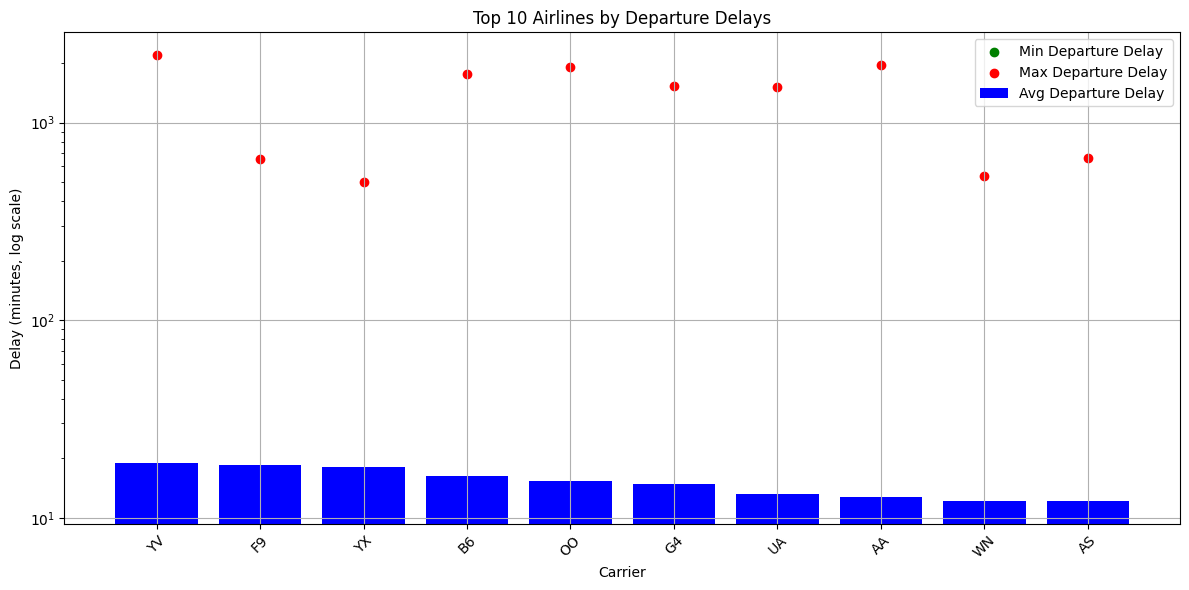

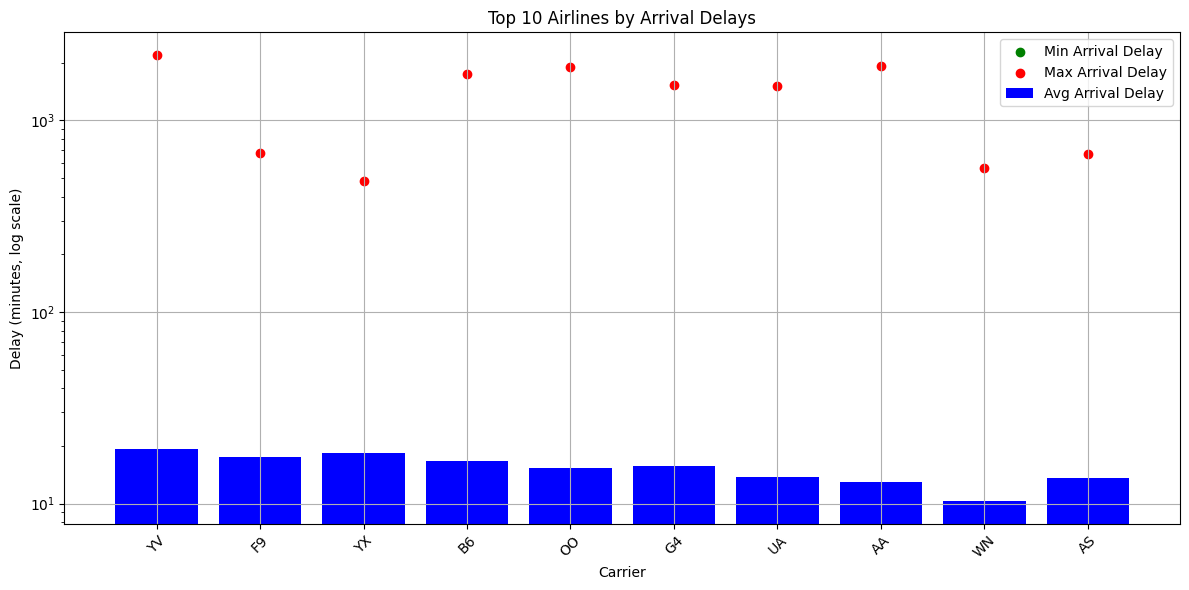

In [ ]:
delay_stats_by_carrier = df.groupby('CARRIER_CODE').agg({
    'DEP_DELAY': ['min', 'max', 'mean'],
    'ARR_DELAY': ['min', 'max', 'mean']
}).reset_index()
delay_stats_by_carrier.columns = ['CARRIER_CODE', 'Min_Dep_Delay', 'Max_Dep_Delay', 'Avg_Dep_Delay',
                                  'Min_Arr_Delay', 'Max_Arr_Delay', 'Avg_Arr_Delay']

top_10_carriers_by_avg_dep_delay = delay_stats_by_carrier.sort_values(by='Avg_Dep_Delay', ascending=False).head(10)

# get the max delay time and carrier
print(top_10_carriers_by_avg_dep_delay.loc[top_10_carriers_by_avg_dep_delay['Max_Dep_Delay'].idxmax()])

# Plot for Departure Delays with log scale
plt.figure(figsize=(12, 6))
plt.bar(top_10_carriers_by_avg_dep_delay['CARRIER_CODE'], top_10_carriers_by_avg_dep_delay['Avg_Dep_Delay'],
        color='blue', label='Avg Departure Delay')
plt.scatter(top_10_carriers_by_avg_dep_delay['CARRIER_CODE'], top_10_carriers_by_avg_dep_delay['Min_Dep_Delay'],
            color='green', label='Min Departure Delay', marker='o')
plt.scatter(top_10_carriers_by_avg_dep_delay['CARRIER_CODE'], top_10_carriers_by_avg_dep_delay['Max_Dep_Delay'],
            color='red', label='Max Departure Delay', marker='o')

plt.yscale('log')
plt.title('Top 10 Airlines by Departure Delays')
plt.ylabel('Delay (minutes, log scale)')
plt.xlabel('Carrier')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Arrival Delays with log scale
plt.figure(figsize=(12, 6))
plt.bar(top_10_carriers_by_avg_dep_delay['CARRIER_CODE'], top_10_carriers_by_avg_dep_delay['Avg_Arr_Delay'],
        color='blue', label='Avg Arrival Delay')
plt.scatter(top_10_carriers_by_avg_dep_delay['CARRIER_CODE'], top_10_carriers_by_avg_dep_delay['Min_Arr_Delay'],
            color='green', label='Min Arrival Delay', marker='o')
plt.scatter(top_10_carriers_by_avg_dep_delay['CARRIER_CODE'], top_10_carriers_by_avg_dep_delay['Max_Arr_Delay'],
            color='red', label='Max Arrival Delay', marker='o')

plt.yscale('log')
plt.title('Top 10 Airlines by Arrival Delays')
plt.ylabel('Delay (minutes, log scale)')
plt.xlabel('Carrier')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From these two graphs, Frontier Airlines has the highest average delay for both departure and arrival, at about 20 minutes. The highest delays for both arrival and departure were American Airlines, at over 38 hours delayed. All airlines have a minumium delay of 0 minutes, showing there was at least one flight that left on time for the given time period.

<ipython-input-13-39b5e1ebaaa8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_state.groupby('CARRIER_CODE').agg({
<ipython-input-13-39b5e1ebaaa8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_state.groupby('CARRIER_CODE').agg({
<ipython-input-13-39b5e1ebaaa8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_state.groupby('CARRIER_CODE').agg({


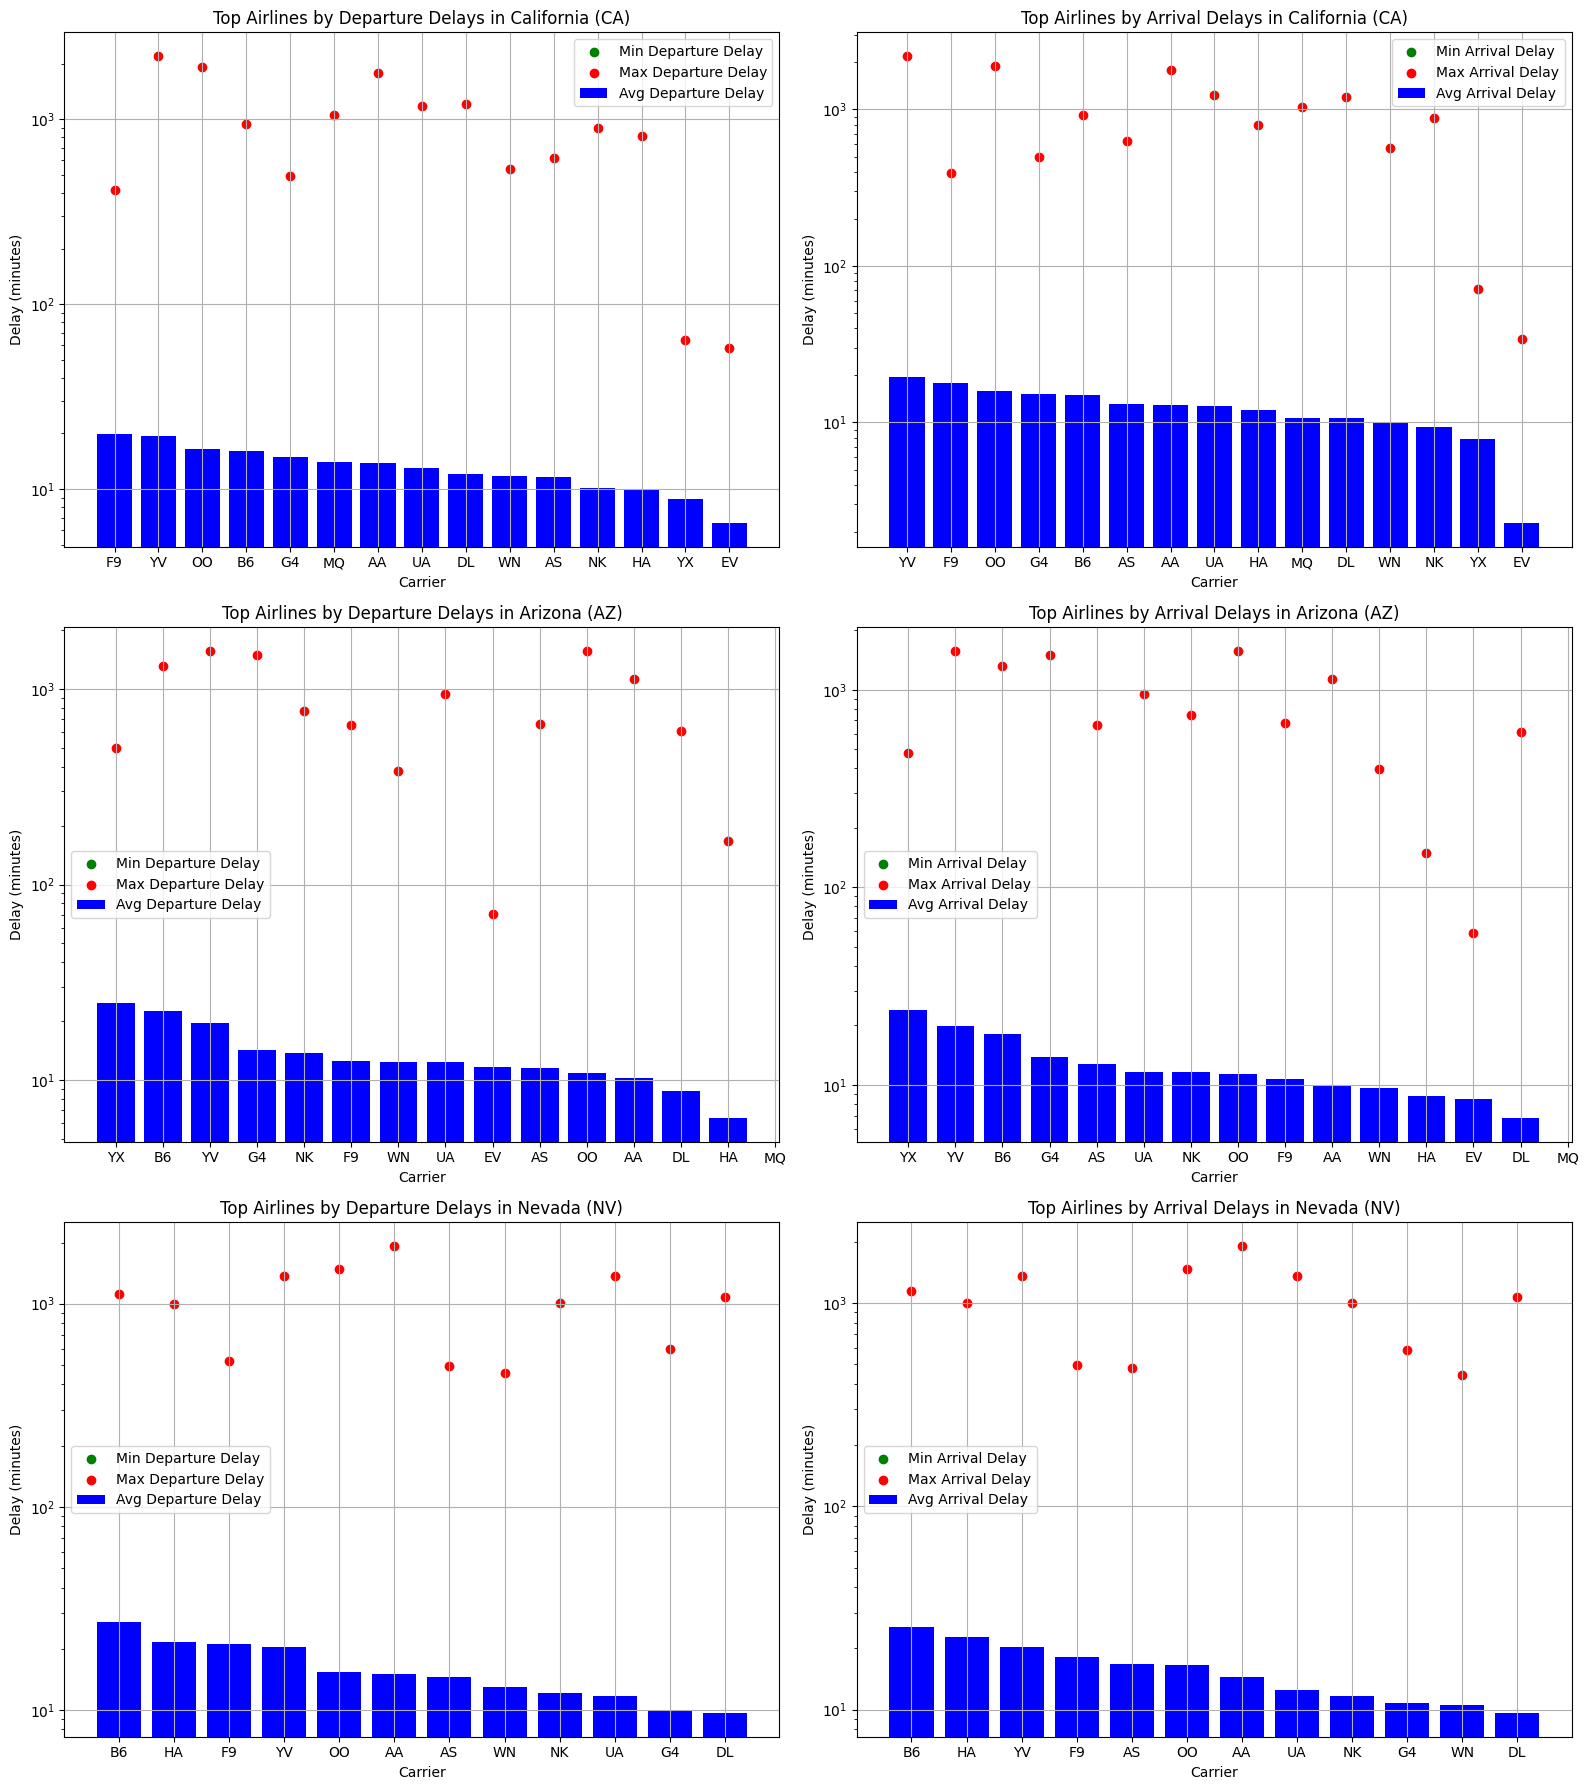

In [ ]:
df_ca = df[df['ORIGIN_ST'] == 'CA']
df_az = df[df['ORIGIN_ST'] == 'AZ']
df_nv = df[df['ORIGIN_ST'] == 'NV']

# group by CARRIER_CODE and calculate min, max, and average delays for each state
def calculate_delay_stats(df_state):
    return df_state.groupby('CARRIER_CODE').agg({
        'DEP_DELAY': ['min', 'max', 'mean'],
        'ARR_DELAY': ['min', 'max', 'mean']
    }).reset_index()

delay_stats_ca = calculate_delay_stats(df_ca)
delay_stats_az = calculate_delay_stats(df_az)
delay_stats_nv = calculate_delay_stats(df_nv)
delay_stats_ca.columns = ['CARRIER_CODE', 'Min_Dep_Delay', 'Max_Dep_Delay', 'Avg_Dep_Delay',
                          'Min_Arr_Delay', 'Max_Arr_Delay', 'Avg_Arr_Delay']
delay_stats_az.columns = delay_stats_ca.columns
delay_stats_nv.columns = delay_stats_ca.columns

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Sort by Avg_Dep_Delay & Avg_Arr_Delay for each state
delay_stats_ca_sorted_dep = delay_stats_ca.sort_values(by='Avg_Dep_Delay', ascending=False)
delay_stats_az_sorted_dep = delay_stats_az.sort_values(by='Avg_Dep_Delay', ascending=False)
delay_stats_nv_sorted_dep = delay_stats_nv.sort_values(by='Avg_Dep_Delay', ascending=False)

delay_stats_ca_sorted_arr = delay_stats_ca.sort_values(by='Avg_Arr_Delay', ascending=False)
delay_stats_az_sorted_arr = delay_stats_az.sort_values(by='Avg_Arr_Delay', ascending=False)
delay_stats_nv_sorted_arr = delay_stats_nv.sort_values(by='Avg_Arr_Delay', ascending=False)

# Plot delays for California (CA) sorted
axes[0, 0].bar(delay_stats_ca_sorted_dep['CARRIER_CODE'], delay_stats_ca_sorted_dep['Avg_Dep_Delay'], color='blue', label='Avg Departure Delay')
axes[0, 0].scatter(delay_stats_ca_sorted_dep['CARRIER_CODE'], delay_stats_ca_sorted_dep['Min_Dep_Delay'], color='green', label='Min Departure Delay', marker='o')
axes[0, 0].scatter(delay_stats_ca_sorted_dep['CARRIER_CODE'], delay_stats_ca_sorted_dep['Max_Dep_Delay'], color='red', label='Max Departure Delay', marker='o')
axes[0, 0].set_title('Top Airlines by Departure Delays in California (CA)')
axes[0, 0].set_ylabel('Delay (minutes)')
axes[0, 0].set_xlabel('Carrier')
axes[0, 0].set_yscale('log')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].bar(delay_stats_ca_sorted_arr['CARRIER_CODE'], delay_stats_ca_sorted_arr['Avg_Arr_Delay'], color='blue', label='Avg Arrival Delay')
axes[0, 1].scatter(delay_stats_ca_sorted_arr['CARRIER_CODE'], delay_stats_ca_sorted_arr['Min_Arr_Delay'], color='green', label='Min Arrival Delay', marker='o')
axes[0, 1].scatter(delay_stats_ca_sorted_arr['CARRIER_CODE'], delay_stats_ca_sorted_arr['Max_Arr_Delay'], color='red', label='Max Arrival Delay', marker='o')
axes[0, 1].set_title('Top Airlines by Arrival Delays in California (CA)')
axes[0, 1].set_ylabel('Delay (minutes)')
axes[0, 1].set_xlabel('Carrier')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot delays for Arizona (AZ) sorted
axes[1, 0].bar(delay_stats_az_sorted_dep['CARRIER_CODE'], delay_stats_az_sorted_dep['Avg_Dep_Delay'], color='blue', label='Avg Departure Delay')
axes[1, 0].scatter(delay_stats_az_sorted_dep['CARRIER_CODE'], delay_stats_az_sorted_dep['Min_Dep_Delay'], color='green', label='Min Departure Delay', marker='o')
axes[1, 0].scatter(delay_stats_az_sorted_dep['CARRIER_CODE'], delay_stats_az_sorted_dep['Max_Dep_Delay'], color='red', label='Max Departure Delay', marker='o')
axes[1, 0].set_title('Top Airlines by Departure Delays in Arizona (AZ)')
axes[1, 0].set_ylabel('Delay (minutes)')
axes[1, 0].set_xlabel('Carrier')
axes[1, 0].set_yscale('log')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].bar(delay_stats_az_sorted_arr['CARRIER_CODE'], delay_stats_az_sorted_arr['Avg_Arr_Delay'], color='blue', label='Avg Arrival Delay')
axes[1, 1].scatter(delay_stats_az_sorted_arr['CARRIER_CODE'], delay_stats_az_sorted_arr['Min_Arr_Delay'], color='green', label='Min Arrival Delay', marker='o')
axes[1, 1].scatter(delay_stats_az_sorted_arr['CARRIER_CODE'], delay_stats_az_sorted_arr['Max_Arr_Delay'], color='red', label='Max Arrival Delay', marker='o')
axes[1, 1].set_title('Top Airlines by Arrival Delays in Arizona (AZ)')
axes[1, 1].set_ylabel('Delay (minutes)')
axes[1, 1].set_xlabel('Carrier')
axes[1, 1].set_yscale('log')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot delays for Nevada (NV) sorted
axes[2, 0].bar(delay_stats_nv_sorted_dep['CARRIER_CODE'], delay_stats_nv_sorted_dep['Avg_Dep_Delay'], color='blue', label='Avg Departure Delay')
axes[2, 0].scatter(delay_stats_nv_sorted_dep['CARRIER_CODE'], delay_stats_nv_sorted_dep['Min_Dep_Delay'], color='green', label='Min Departure Delay', marker='o')
axes[2, 0].scatter(delay_stats_nv_sorted_dep['CARRIER_CODE'], delay_stats_nv_sorted_dep['Max_Dep_Delay'], color='red', label='Max Departure Delay', marker='o')
axes[2, 0].set_title('Top Airlines by Departure Delays in Nevada (NV)')
axes[2, 0].set_ylabel('Delay (minutes)')
axes[2, 0].set_xlabel('Carrier')
axes[2, 0].set_yscale('log')
axes[2, 0].legend()
axes[2, 0].grid(True)

axes[2, 1].bar(delay_stats_nv_sorted_arr['CARRIER_CODE'], delay_stats_nv_sorted_arr['Avg_Arr_Delay'], color='blue', label='Avg Arrival Delay')
axes[2, 1].scatter(delay_stats_nv_sorted_arr['CARRIER_CODE'], delay_stats_nv_sorted_arr['Min_Arr_Delay'], color='green', label='Min Arrival Delay', marker='o')
axes[2, 1].scatter(delay_stats_nv_sorted_arr['CARRIER_CODE'], delay_stats_nv_sorted_arr['Max_Arr_Delay'], color='red', label='Max Arrival Delay', marker='o')
axes[2, 1].set_title('Top Airlines by Arrival Delays in Nevada (NV)')
axes[2, 1].set_ylabel('Delay (minutes)')
axes[2, 1].set_xlabel('Carrier')
axes[2, 1].set_yscale('log')
axes[2, 1].legend()
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In the above graphs, it is clear that flights originating from California have longer average departure and arrival delays across all airlines. In both California and Nevada, Frontier Airlines dominates the departure and arrival delays, but in Arizone Frontier is 8th in departure delays and 9th in arrival delays, suggesting that this carrier performs significantly better in Arizona airports.

# Question 5.1

Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".


The criteria I have chosen for "the best preformance" is Punctuality (average delays)('DEP_DELAY' and 'ARR_DELAY'). My rational for choosing this is that airlines with fewer delays provide a better overall experience for passengers. Sticking to sceduled times and having lower waiting times in general bodes well when people consider who they will fly with. Punctuality directly represnts the reliability and efficiency of an airline.

<ipython-input-14-bbc47f0c34b2>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_per_carrier = df_filtered.groupby('CARRIER_CODE')['TOTAL_DELAY'].mean().reset_index()


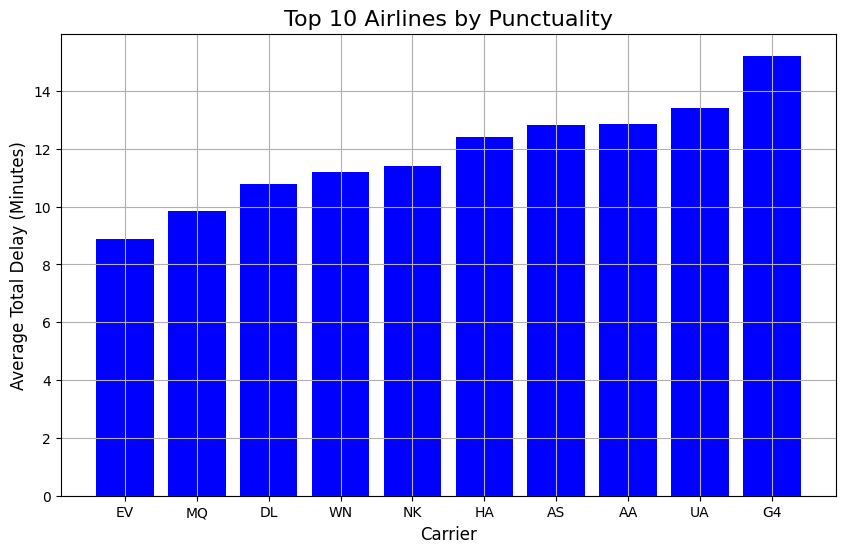

In [ ]:
# group by carrier and calculate the avg delay for departure and arrival combined
df['TOTAL_DELAY'] = (df['DEP_DELAY'] + df['ARR_DELAY']) / 2  # Averaging departure and arrival delays

# filter out flights that left early (negatives)
df_filtered = df[df['TOTAL_DELAY'] >= 0]

# group by carrier and calculate the mean of their total delays
avg_delay_per_carrier = df_filtered.groupby('CARRIER_CODE')['TOTAL_DELAY'].mean().reset_index()

# sort by average delay (ascending order for punctuality) and select the top 10 airlines with the least delay
top_10_airlines = avg_delay_per_carrier.sort_values('TOTAL_DELAY').head(10)

# create bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_airlines['CARRIER_CODE'], top_10_airlines['TOTAL_DELAY'], color='blue')
plt.title('Top 10 Airlines by Punctuality', fontsize=16)
plt.ylabel('Average Total Delay (Minutes)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.grid(True)

plt.show()

From this graph you can see that WN has the best performance based on punctuality with an average delay of about 10 minutes, while AA has the lowest performance with an average delay of about 14 mintues, an almost 4 minute difference between average delay time.


# Question 5.2

For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.


<ipython-input-15-e9dfbc1bf27a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_flight_hours = df.groupby(['CARRIER_CODE', 'Month'])['Flight_Hours'].sum().reset_index()
<ipython-input-15-e9dfbc1bf27a>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_flight_hours = monthly_flight_hours.groupby('CARRIER_CODE')['Flight_Hours'].sum().nlargest(10).reset_index()


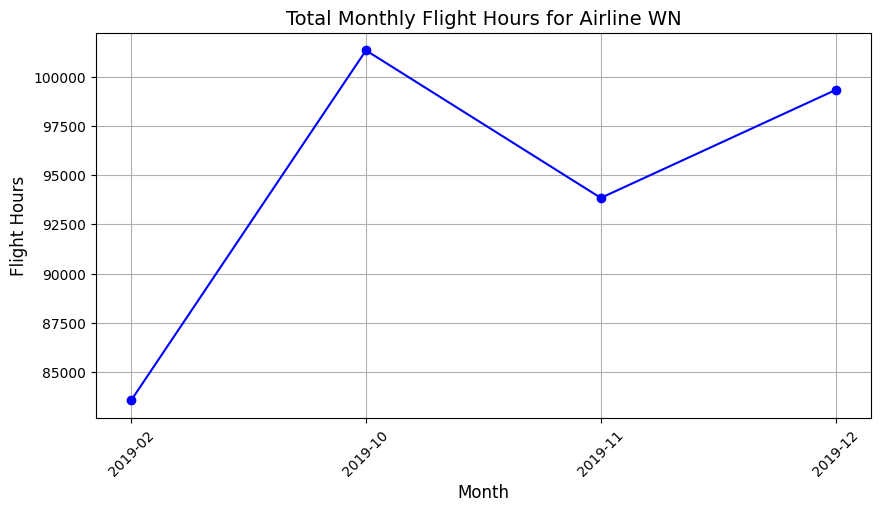

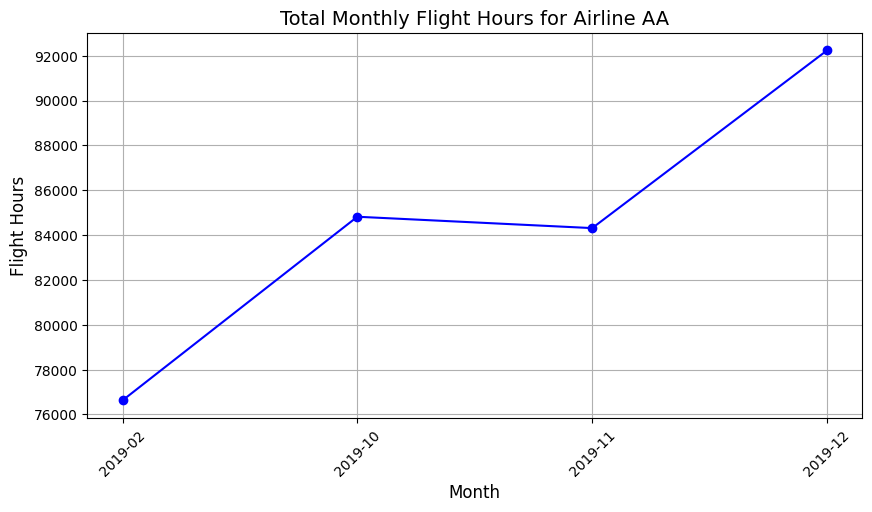

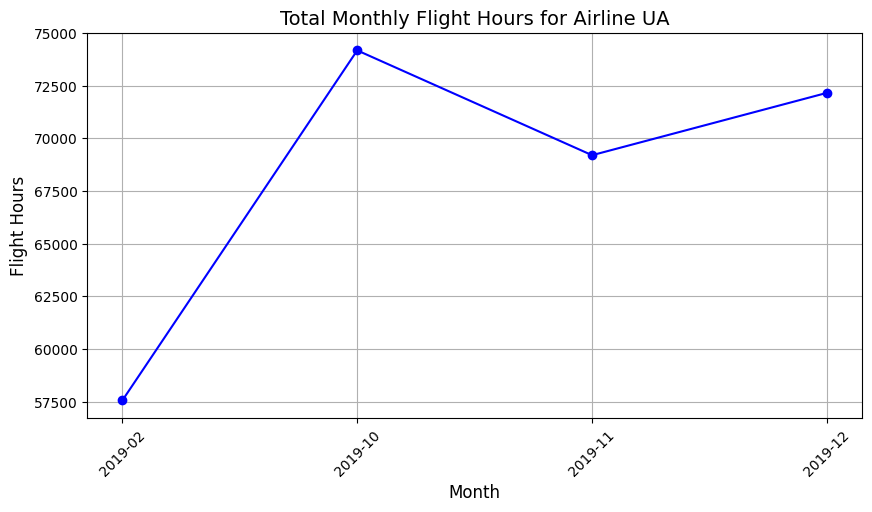

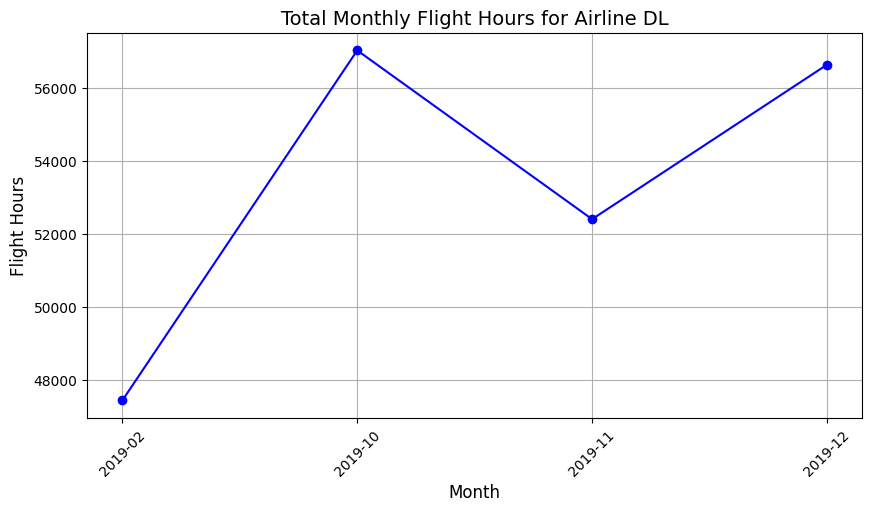

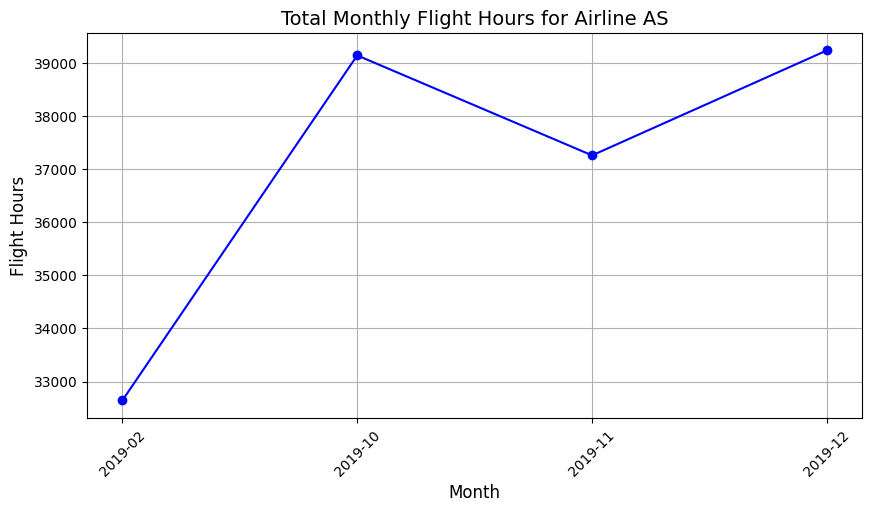

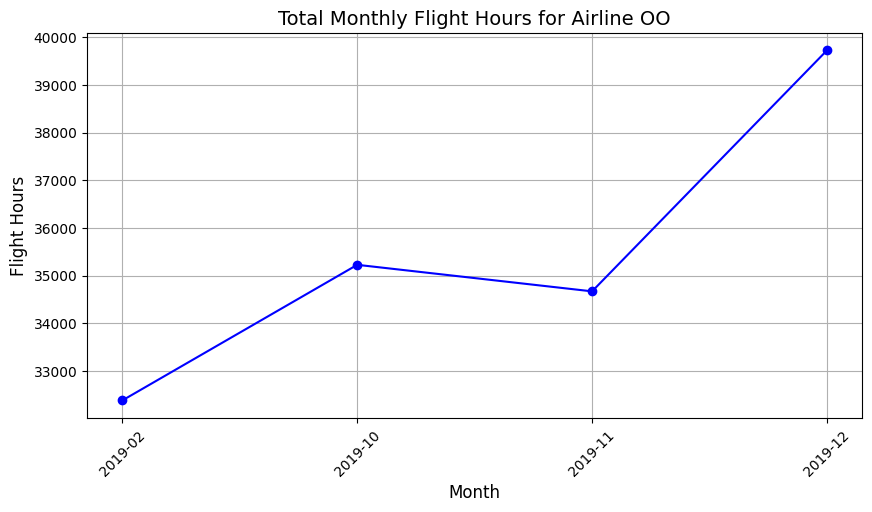

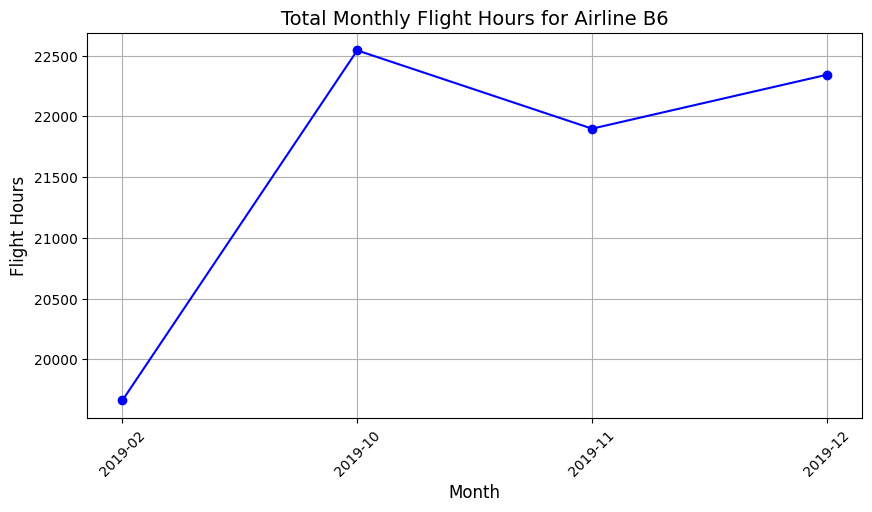

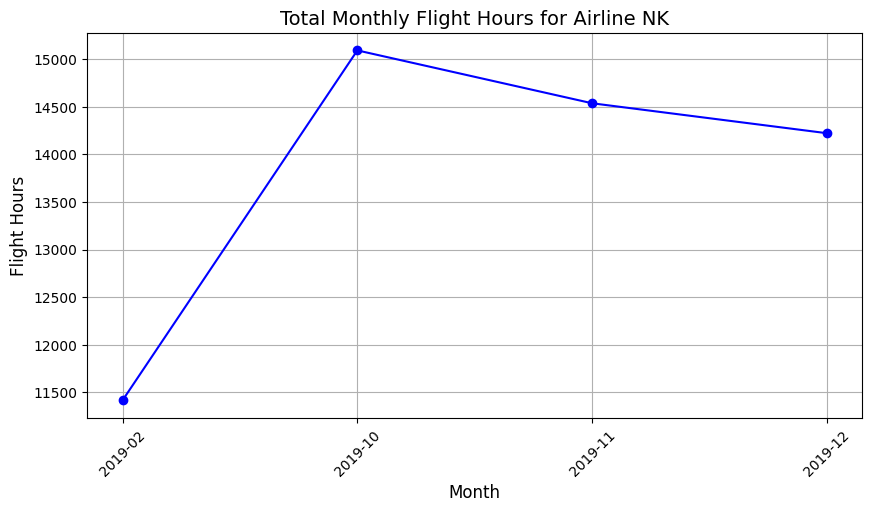

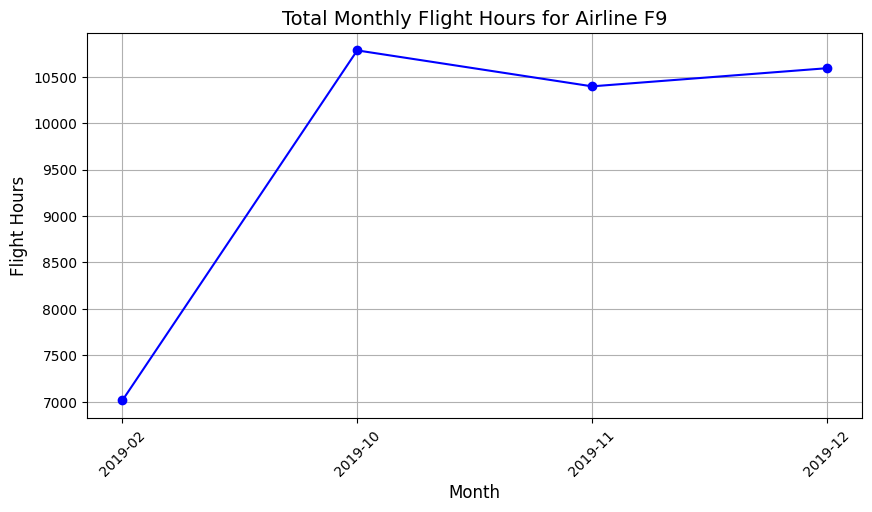

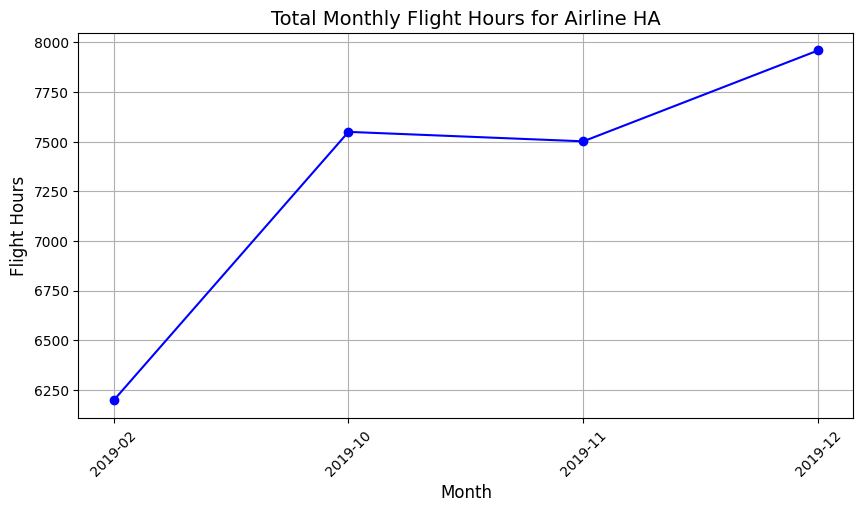

In [ ]:
# convert 'FL_DATE' to datetime and isolate the month
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Month'] = df['FL_DATE'].dt.to_period('M')

# convert 'ELAPSED_TIME' from mins to hrs
df['Flight_Hours'] = df['ELAPSED_TIME'] / 60

# group by carrier and month and sum the flight hours
monthly_flight_hours = df.groupby(['CARRIER_CODE', 'Month'])['Flight_Hours'].sum().reset_index()

# find the top 10 airlines by total flight hours
total_flight_hours = monthly_flight_hours.groupby('CARRIER_CODE')['Flight_Hours'].sum().nlargest(10).reset_index()

# filter the top 10 airlines monthly hours
top_10_airlines = monthly_flight_hours[monthly_flight_hours['CARRIER_CODE'].isin(total_flight_hours['CARRIER_CODE'])]

def plot_airline_flight_hours(carrier_code, data):
    '''
    Return a line plot for each of the top 10 carriers
    '''
    carrier_data = data[data['CARRIER_CODE'] == carrier_code]

    # create line plot
    plt.figure(figsize=(10, 5))
    plt.plot(carrier_data['Month'].astype(str), carrier_data['Flight_Hours'], marker='o', color='b', linestyle='-')
    plt.title(f'Total Monthly Flight Hours for Airline {carrier_code}', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Flight Hours', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()

# call the function to create plots for each of the top 10 airlines
for carrier in total_flight_hours['CARRIER_CODE']:
    plot_airline_flight_hours(carrier, top_10_airlines)

Across majority of the carriers there are 3 major trends:
1) February Drop: There is a noticeable dip in flight hours during February, possibly due to the shorter month and reduced travel demand during the winter.
2) Peak in the Summer: Flight hours increase significantly during the summer months, with the peak of the graph typically seen in this period. This suggests heightened travel for vacations and tourism during summer which is to be expected.
3) Fall Decline: After the summer peak, flight hours gradually decrease through the fall, with a potential rise again in December, probably due to holiday travel.

# Question 6.1

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

Indicate which airline operates the selected aircraft and where it often travels.


In [61]:
# Select 3 unique aircraft using TAIL_NUM
tail_nums = df['TAIL_NUM'].unique()[:3]
print(f"Selected Aircraft (TAIL_NUM): {tail_nums}")

# Filter the dataset for the selected aircraft
selected_aircraft_df = df[df['TAIL_NUM'].isin(tail_nums)]

# Identify most frequent routes for airlines operating each aircraft
airlines = selected_aircraft_df.groupby('TAIL_NUM')['CARRIER_CODE'].unique()
airlines = airlines[airlines.index.isin(tail_nums)]
routes = selected_aircraft_df.groupby('TAIL_NUM')[['ORIGIN', 'DEST']].agg(lambda x: x.value_counts().index[0])
routes = routes[routes.index.isin(tail_nums)]

print("\nAirlines operating each aircraft:")
print(airlines)
print("\nMost frequent travel routes:")
print(routes)




Selected Aircraft (TAIL_NUM): ['N916NN', 'N733UW', 'N140AN']
Categories (4666, object): ['215NV', '216NV', '217NV', '218NV', ..., 'N998AT', 'N998JE', 'N998NN',
                            'N999JQ']


<ipython-input-61-9467baf3b69e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airlines = selected_aircraft_df.groupby('TAIL_NUM')['CARRIER_CODE'].unique()
<ipython-input-61-9467baf3b69e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  routes = selected_aircraft_df.groupby('TAIL_NUM')[['ORIGIN', 'DEST']].agg(lambda x: x.value_counts().index[0])



Airlines operating each aircraft:
TAIL_NUM
N140AN    ['AA']
Categories (15, object): ['AA', 'AS', '...
N733UW    ['AA']
Categories (15, object): ['AA', 'AS', '...
N916NN    ['AA']
Categories (15, object): ['AA', 'AS', '...
Name: CARRIER_CODE, dtype: object

Most frequent travel routes:
         ORIGIN DEST
TAIL_NUM            
N140AN      LAX  LAX
N733UW      PHX  PHX
N916NN      DFW  DFW


To analyze information about specific aircrafts, we selected 3 at random, all of which happened to be from American Airlines. The first plane, N916NN most frequented DWF. The second plane, N733UW, most frequent PHX airport, and the third plane, N140AN, most frequent LAX airport.

# Question 6.2


Arrival and departure delays at the airports where it traveled.


<ipython-input-64-ff037dbfdabc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delays = selected_aircraft_df.groupby(['TAIL_NUM', 'ORIGIN'])[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()


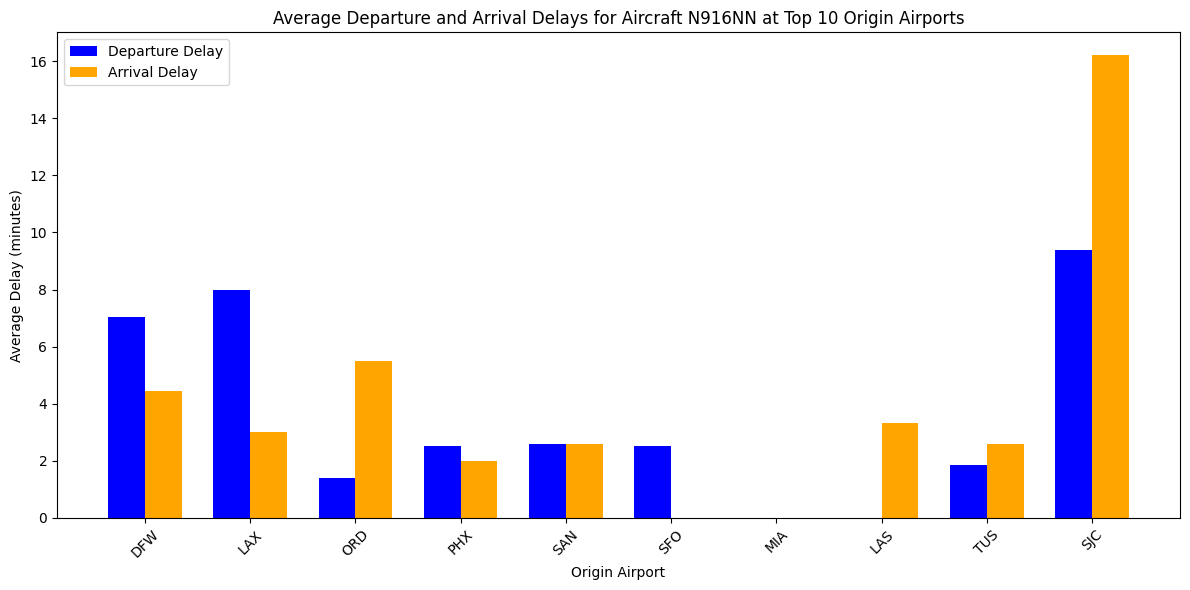

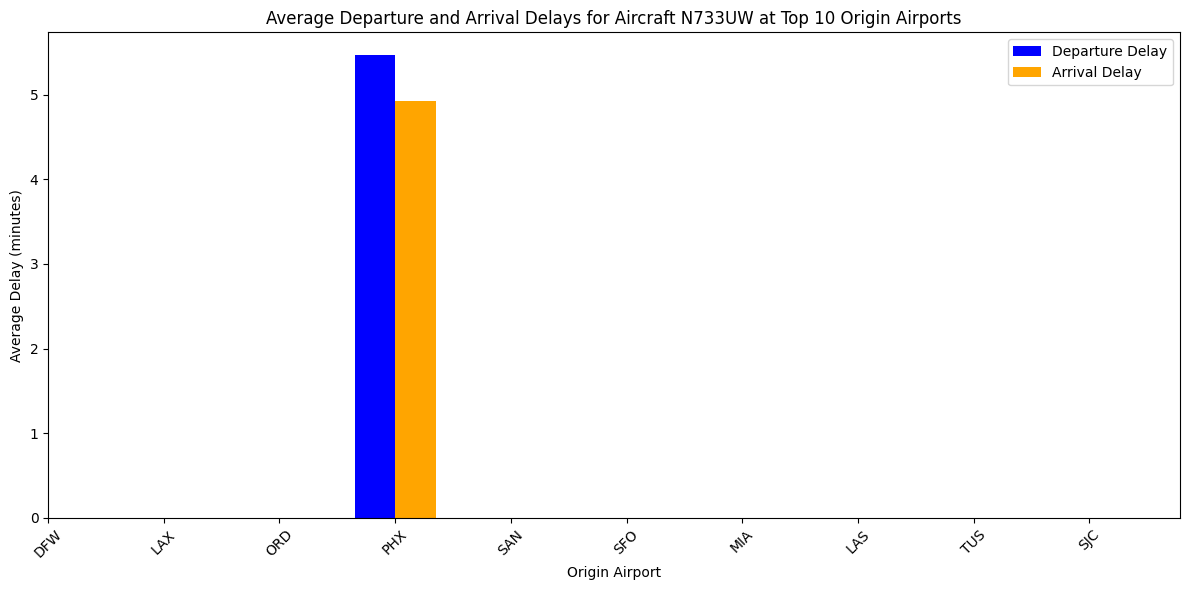

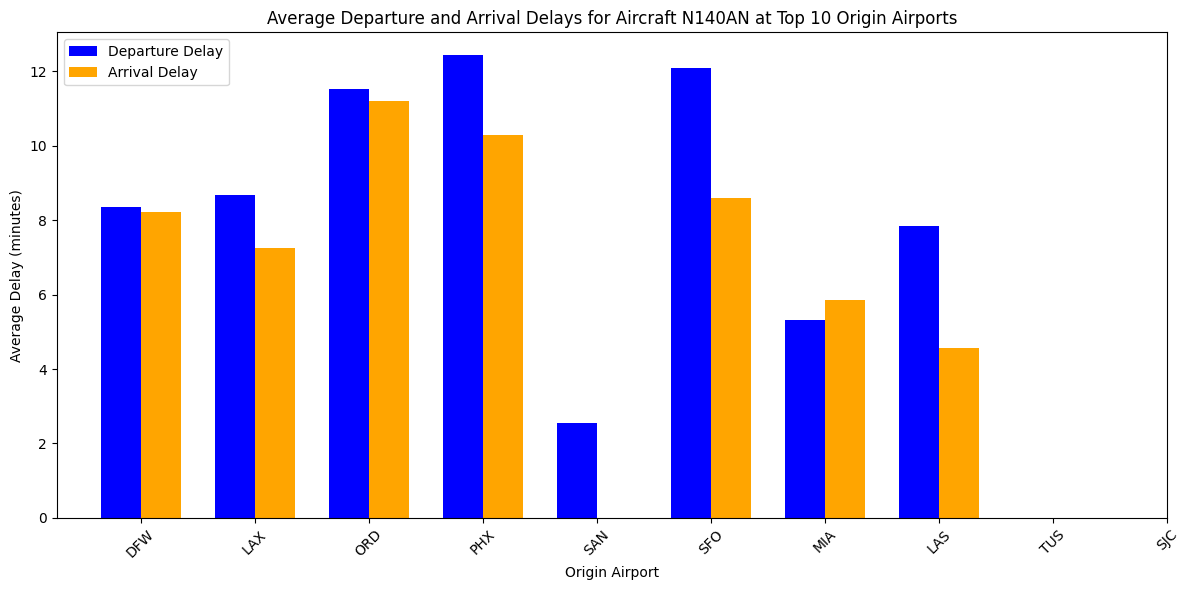

In [64]:
# Compute the average departure and arrival delays
delays = selected_aircraft_df.groupby(['TAIL_NUM', 'ORIGIN'])[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

# Get the top 10 most frequent origin airports for the selected aircraft
top_10_origins = selected_aircraft_df['ORIGIN'].value_counts().nlargest(10).index
delays_top_10 = delays[delays['ORIGIN'].isin(top_10_origins)]
bar_width = 0.35

# Create an individual plot for each tail number
for tail_num in tail_nums:
    aircraft_data = delays_top_10[delays_top_10['TAIL_NUM'] == tail_num]

    dep_delays = np.array([aircraft_data[aircraft_data['ORIGIN'] == origin]['DEP_DELAY'].values[0]
                           if origin in aircraft_data['ORIGIN'].values else 0
                           for origin in top_10_origins])

    arr_delays = np.array([aircraft_data[aircraft_data['ORIGIN'] == origin]['ARR_DELAY'].values[0]
                           if origin in aircraft_data['ORIGIN'].values else 0
                           for origin in top_10_origins])

    # Create a new figure for each aircraft
    plt.figure(figsize=(12, 6))

    # Define the positions for the bars on the x-axis
    x = np.arange(len(top_10_origins))

    # Plot departure delays
    plt.bar(x - bar_width/2, dep_delays, width=bar_width, label='Departure Delay', color='blue')

    # Plot arrival delays
    plt.bar(x + bar_width/2, arr_delays, width=bar_width, label='Arrival Delay', color='orange')

    # Set labels for the plot
    plt.title(f"Average Departure and Arrival Delays for Aircraft {tail_num} at Top 10 Origin Airports")
    plt.xlabel("Origin Airport")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(x, top_10_origins, rotation=45)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()


For the first plane, the average departure and arrival delays were significantly highest at LAX with over a 2 hour delay on average. The second plane only had delays at two of the top 10 most traveled airports and, interestingly, had its highest average delays at its most frequented airport PHX, with an average arrival and departure delay of around 12 minutes. There being no arrival delay at TUS suggests the plane arrived on time, but departed just 1 minutes late. The third plane had delays spread across all of its Top 10 origin airports, as it made the most flights out of all of the planes in 2019, which we will see later, with its highest at DFW.

# Question 6.3


Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.

<ipython-input-42-2386c1e27aee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_stats = selected_aircraft_df.groupby('TAIL_NUM')['DISTANCE'].describe()



Summary statistics for distances traveled by each aircraft:
          count         mean         std    min     25%     50%     75%  \
TAIL_NUM                                                                  
N140AN    157.0  1536.127389  588.749694  236.0  1235.0  1464.0  1947.0   
N733UW     30.0   756.033333  521.524455  110.0   325.0   611.5  1044.0   
N916NN     73.0  1429.849315  435.945673  236.0  1188.0  1438.0  1723.0   

             max  
TAIL_NUM          
N140AN    2611.0  
N733UW    1995.0  
N916NN    2527.0  


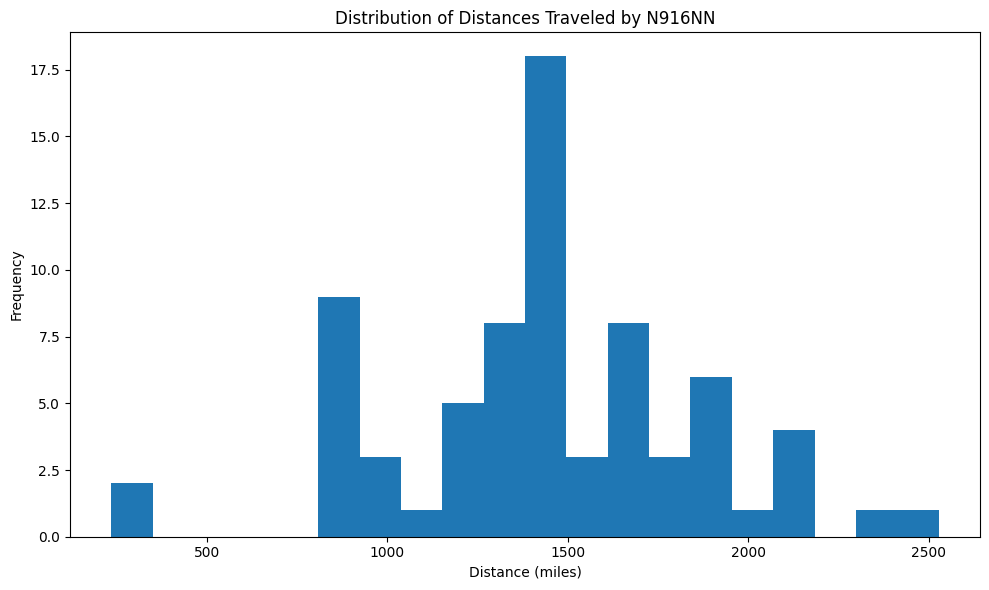

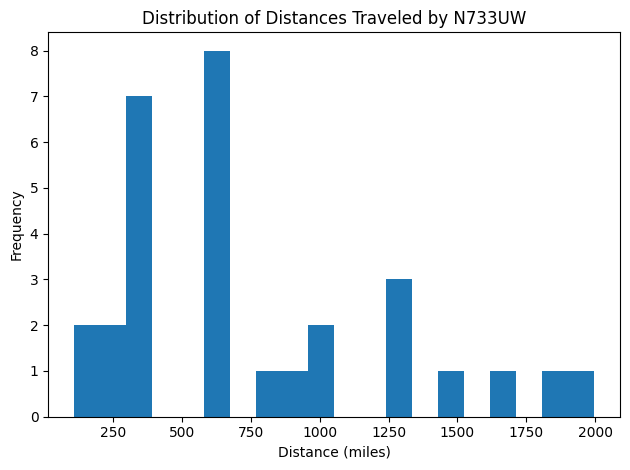

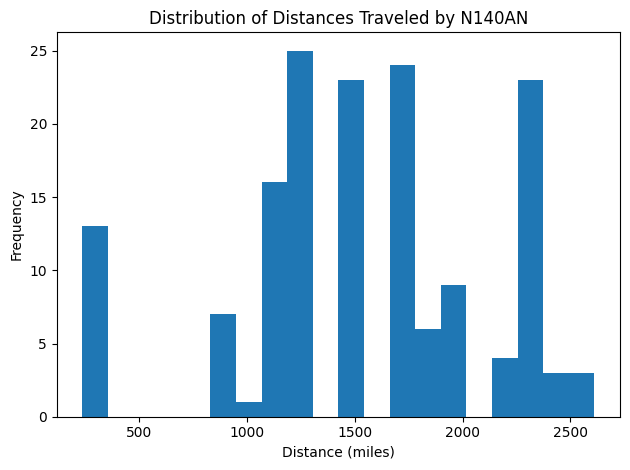

In [ ]:
# Summary statistics on the distances traveled by each selected aircraft
distance_stats = selected_aircraft_df.groupby('TAIL_NUM')['DISTANCE'].describe()
print("\nSummary statistics for distances traveled by each aircraft:")
filtered_distance_stats = distance_stats[distance_stats.index.isin(tail_nums)]
print(filtered_distance_stats)

# Visualize distance distributions for the selected aircraft
plt.figure(figsize=(10, 6))
for tail_num in tail_nums:
    aircraft_data = selected_aircraft_df[selected_aircraft_df['TAIL_NUM'] == tail_num]
    plt.hist(aircraft_data['DISTANCE'], bins=20, label=f'Tail Number: {tail_num}')
    plt.title(f"Distribution of Distances Traveled by {tail_num}")
    plt.xlabel("Distance (miles)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

The plane N916NN most commonly traveled just shy of around 1500 miles, but having a relatively even spread with some very short flights and some much longer flights. N733UW had a much different spread with much shorter flights, having the most flights around about 350 and 650 miles. N140AN had the most flights by far, and a much larger spread than the other planes as well, with both many short flights, many medium distance flights around 1200 miles, and many longer flights closer to 2500. Although N916NN had a much different spread than N140AN, they had a very similar mean distance of all of their flights.

From this data we can infer by analyzing the average departure/arrival delay and distribution of distances traveled visuals that there is a negative correlation between the distance traveled and the average delay (in minutes) for each flight. As we can see, flight N140AN experiences typically further flights, and they usually have little to no delays. On the contrary, flight N733UW experiences shorter flights on average, whilst substantially having the average longest delay. Through these observations, we can make a more generalized conclusion that the further the distance of the flight, the less the expected delay will be.



# Question 6 - Overall Analysis


Summarize the overall analysis and share THREE (3) key findings.



In this practicum, we were tasked with analyzing flight data from the Bureau of Transportation Statistics for the year 2019. We specifically focused on flights arriving or departing from Arizona, Nevada, and California. Our primary objective was to explore flight arrival/departure delays, air traffic patterns amongst different airports, and the overall performance of various airlines.

One key finding that we found was that California was evidently the state with the highest amount of overall air traffic. We came to this conclusion by analyzing the frequency of flight departure and arrivals, with which California was the highest by far. It is the largest state by area and population, which may be the reason for this.

Another key finding regarded airline performance discrepancies. There were considerable discrepancies in airline performance, with American Airlines and Frontier Airlines exhibiting the highest delays. Conversely, airlines like Delta showed better on-time performance, especially in Arizona, suggesting that regional operational strategies may impact delays.

A final finding that we found key was the correlation between flight distance and Delays. The analysis indicated a negative correlation between the distance of flights and average delays, implying that longer flights tend to be more reliable in terms of timeliness. This could reflect operational efficiencies in managing long-haul flights compared to short-haul routes, which may be affected by higher traffic congestion.

These findings highlight critical areas for improvement in the airline industry, particularly for carriers operating in high-traffic regions like California, and emphasize the importance of data analysis in enhancing operational strategies.